<a href="https://colab.research.google.com/github/LuisPerdomo123/Inteligencia-Computacional/blob/main/Perceptron_Multicapa_Caso_Practivo_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptrón  Multicapa: Caso práctico II

## Dataset

La base de datos del MnIST (base de datos modificada del Instituto Nacional de Normas y Tecnología) es una base de datos de dígitos manuscritos que se utiliza comúnmente para la capacitación de diversos sistemas de procesamiento de imágenes. La base de datos también se utiliza amplimante para la capcitación y el ensayo en el campo del aprendizaje automático. Se creó "remezclando" las muestras de los conjuntos de datos originales del NIST. Los creadores consideraron que, dado que el conjunto de datos de capacitación del NIST fue tomado de los empleados de la Oficina del Censo de los Estados Unidos, mientras que el conjunto de datos de prueba fue tomado de los estudiantes de secundaria de los Estados Unidos, no era muy adecuado para los experimentos de aprendizaje automático. Además, las imágenes en blanco y negro del NIST fueron normalizadas para que encajaran en un cuadro delimitador de 28x28 pixeles, lo que introdujo niveles de escala de grises.

La base de datos del MNIST contiene 60.000 imágenes de entrenamiento y 10.000 imágenes de pruebas. La mitad del conjunto de entrenamiento y la otra mitad del conjunto de pruebas se tomaron del conjunto de datos de entrenamiento del NIST, mientras que la otra mitad del conjunto de entramiento y la otra mitad del conjunto de pruebas se tomaron del conjunto de datos de pruebas del NIST. Los creadores originales de la base de daros mantienen una lista de algunos de los métodos probados en ella. En su papel original, utilizan una máquina de soporte vectorial para obtener una tasa de error del 0.8 %. En 2017 se ha publicado un conjunto de datos ampliado similar al MNIST llamado EMNIST, que contiene 240.000 imágenees de entrenamiento y 40.000 imágenes de prueba de dígitos y caracteres escritos a mano.

## Enunciado

En este caso de uso prático vamos a recuperar el ejercicio de clasificación de imágenes que realizamos en el apartado anterior para intentar mejorarlo aplicando un Perceptrón Multicapa.

## 1. Lectura del conjunto de datos

In [13]:
# Importamos el conjunto de datos
from sklearn.datasets import fetch_openml

# Añadimos as_frame=False para forzar la devolución de un array
mnist = fetch_openml('mnist_784',  as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [14]:
# Convirtiendo el conjunto de datos en un DataFrame de Pandas
import pandas as pd

df = pd.DataFrame(mnist.data)
df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2. Visualización del conjunto de datos

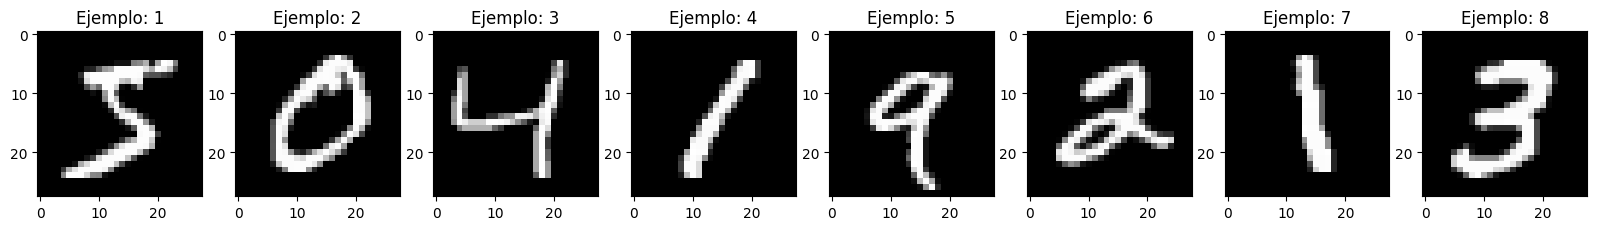

In [15]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))

for index, digit in zip(range(1, 9), mnist.data[:8]):
    plt.subplot(1, 8, index)
    plt.imshow(np.reshape(digit, (28,28)), cmap=plt.cm.gray)
    plt.title('Ejemplo: ' + str(index))
plt.show()



## 3. División del conjunto de datos

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.15)

In [19]:
print(len(X_train))
print(len(X_test))

59500
10500


## 4. Entrenamiento del algritmo

Se realiza el entrenamiento del la red neuronal multicapa. Para el presente ejercicio de clasificación de imágenes se realiza la importación MLPClassifier (perceptrón multicapacon sklearn-presente sección).
Se realiza la modificación de los parámetros que se introducen al perceptrón multicapa, al tener un conjunto de datos más robusto.
La función de activación "logistic" que es la función de activación sigmoide. Como función de optimización "sgd" que es Gradient Descent (Stocastic Gradient Descent).
Tiene tres capas (entrada, hidden layer, output layer). La hidden layer esta compuesta por 50 neuronas.
Se invoca el método fit de entrenamiento. Esto permite ajustar los parámetros del modelo.

In [21]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(50,), activation='logistic', solver='sgd')
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(50,), solver='sgd')

In [23]:
# Número de capas del perceptrón multicapa
clf.n_layers_

3

In [25]:
# Número de otputs del perceptrón multicapa
# Esto se debe a que esta compuesto por multiclases
clf.n_outputs_

10

In [27]:
# Número de parámetros que forman el modelo
clf.coefs_[0].shape

(784, 50)

In [32]:
# Dimensiones de la primera capa (hidden layer)
clf.coefs_[1].shape

(50, 10)

In [31]:
# Dimensiones de la segunda capa (otpulayer layer)
clf.coefs_[1].shape

(50, 10)

In [29]:
# Parámetros bias/intercept que forman parte de cada capa de la red neuronal
clf.intercepts_[0].shape

(50,)

## 5. Predicción con el conjunto de pruebas




In [33]:
# Realziamos la predicción con el conjunto de daros de prueba
y_pred = clf.predict(X_test)

In [34]:
# Mostramos el f1_score resultante de la clasificación
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average="weighted")

0.9479813518173555

Esto quiere decir que se ha realizado la clasificación con 94.7 % excatitud en la clasificación de las imágenes.
La clasificación ha mejorado respecto a la realizada con el perceptrón simple en un 15 %. Esto se debe a que el perceptrón multicapa tienen funciones matemáticas complejas que se ajustan de mayor forma con el conjunto de imágenes.

Es importante revisar como mejora al aumentar el numero de neuronas (a mayor número de neuronas, se tiene mayor flexibilidad). La predicción puede mejorar.


## Mostrando las imágenes mal clasificadas

In [35]:
import numpy as np
import matplotlib.pyplot as plt

index = 0
index_errors = []

for label, predict in zip(y_test, y_pred):
  if label != predict:
    index_errors.append(index)
  index += 1

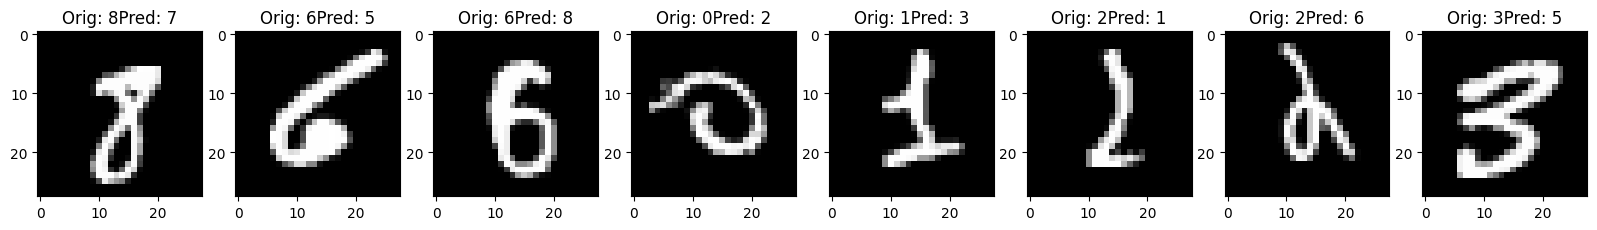

In [36]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 4))

for i, img_index in zip(range(1, 9), index_errors[8:16]):
  plt.subplot(1,8,i)
  plt.imshow(np.reshape(X_test[img_index],(28,28)), cmap=plt.cm.gray)
  plt.title('Orig: ' + str(y_test[img_index]) + 'Pred: ' + str(y_pred[img_index]))
plt.show()